# Assignment no 5
### Problem Statement   : Implement SVM for classification with proper data set of your choice
### Name                : Sahil A. Shaikh
### Class               : BE-11
### Roll No             : 43365


### I have used titanic dataset to predict the survival of the boarded Passengers

## Step 1 : Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 : Load the train and test datasets

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

- Checking the dataframes

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- Checking for the inconsistent data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Step 3 : Data Cleaning / Feature Engineering

- We can see that PassengerId cannot contribute in predicction of survival of the Passenger, Also there are alot of missing entries in the Cabin feature. Hence We can directly drop those features in order to get accurate results

In [8]:
train = train.drop(["PassengerId", "Cabin"], axis = 1)
test = test.drop(["PassengerId", "Cabin"], axis = 1)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


- The missing values of the age can be replaced by the mean of the column in both the cases

In [10]:
train["Age"] = train["Age"].fillna(train["Age"].mean())
test["Age"] = test["Age"].fillna(test["Age"].mean())

In [11]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [12]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- As we can see most of the data entries consist of embarked values to S, we can fill missing data by replacing those values with S

In [13]:
train["Embarked"] = train["Embarked"].fillna('S',inplace = True)

In [14]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked    891
dtype: int64

- As similar as age, we can full the NaN value of Fare in test data with the mean value of that feature column

In [15]:
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())

In [16]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  0 non-null      object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


- In order to get proper result we need numeric data, hence converting the Sex into binary data

In [18]:
test["Sex"] = test["Sex"].map({'male': 0,'female':1})
train["Sex"] = train["Sex"].map({'male': 0,'female':1})

In [19]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,None
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,None
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,None
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,None
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,None


## Step 4 : Exploratory Data

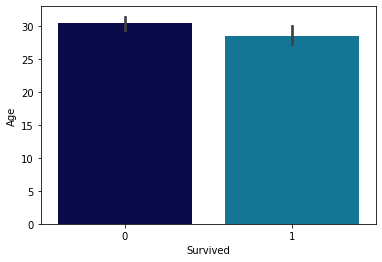

In [20]:
sns.barplot(x="Survived",y="Age",data=train,palette = "ocean")

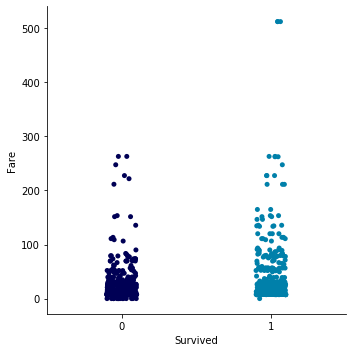

In [21]:
sns.catplot(x="Survived", y="Fare",data=train,palette="ocean")

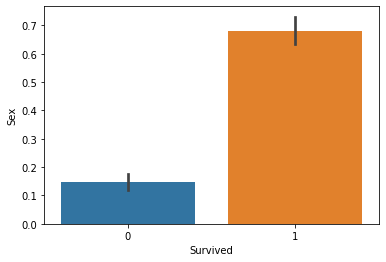

In [22]:
sns.barplot(x="Survived",y="Sex",data=train)

## Step 5 : Train SVM models and Predict the Survival

- Preparing Features to train the model

In [23]:
features = ['Pclass','Sex','Age','Parch','Fare','SibSp']
X_train = train[features]
X_test = test[features]
Y_train = train['Survived']

- Importing Libraries required for SVM classifier model

In [24]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [25]:
model = svm.SVC(kernel = 'linear')

In [26]:
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
pred = model.predict(X_train)

In [28]:
print("Linear SVM kernel accuracy is: ", round(accuracy_score(Y_train,pred) * 100 , 2))

Linear SVM kernel accuracy is:  78.68


In [29]:
model_radial = svm.SVC(kernel='rbf', gamma=7)

In [30]:
model_radial.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=7, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [31]:
pred_radial = model_radial.predict(X_train)

In [32]:
print("Radial SVM kernel accuracy is: ", round(accuracy_score(Y_train,pred_radial) * 100 , 2))

Radial SVM kernel accuracy is:  96.3


In [33]:
pred_test = model_radial.predict(X_test)